# Multiple Linear Regression - Cumulative Lab

## Introduction

In this cumulative lab you'll perform an end-to-end analysis of a dataset using multiple linear regression.

## Objectives

You will be able to:

* Prepare data for regression analysis using pandas
* Build multiple linear regression models using StatsModels
* Measure regression model performance
* Interpret multiple linear regression coefficients

## Your Task: Develop a Model of Diamond Prices

![tweezers holding a diamond](https://curriculum-content.s3.amazonaws.com/data-science/images/diamond.jpg)

Photo by <a href="https://unsplash.com/@tahliaclaire?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Tahlia Doyle</a> on <a href="https://unsplash.com/s/photos/diamonds?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

You've been asked to perform an analysis to see how various factors impact the price of diamonds. There are various [guides online](https://www.diamonds.pro/education/diamond-prices/) that claim to tell consumers how to avoid getting "ripped off", but you've been asked to dig into the data to see whether these claims ring true.

### Data Understanding

We have downloaded a diamonds dataset from [Kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds), which came with this description:

* **price** price in US dollars (\$326--\$18,823)
* **carat** weight of the diamond (0.2--5.01)
* **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* **color** diamond colour, from J (worst) to D (best)
* **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* **x** length in mm (0--10.74)
* **y** width in mm (0--58.9)
* **z** depth in mm (0--31.8)
* **depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* **table** width of top of diamond relative to widest point (43--95)

### Requirements

#### 1. Load the Data Using Pandas

Practice once again with loading CSV data into a `pandas` dataframe.

#### 2. Build a Baseline Simple Linear Regression Model

Identify the feature that is most correlated with `price` and build a StatsModels linear regression model using just that feature.

#### 3. Evaluate and Interpret Baseline Model Results

Explain the overall performance as well as parameter coefficients for the baseline simple linear regression model.

#### 4. Prepare a Categorical Feature for Multiple Regression Modeling

Identify a promising categorical feature and use `pd.get_dummies()` to prepare it for modeling.

#### 5. Build a Multiple Linear Regression Model

Using the data from Step 4, create a second StatsModels linear regression model using one numeric feature and one one-hot encoded categorical feature.

#### 6. Evaluate and Interpret Multiple Linear Regression Model Results

Explain the performance of the new model in comparison with the baseline, and interpret the new parameter coefficients.

## 1. Load the Data Using Pandas

Import `pandas` (with the standard alias `pd`), and load the data from the file `diamonds.csv` into a DataFrame called `diamonds`.

Be sure to specify `index_col=0` to avoid creating an "Unnamed: 0" column.

In [4]:
# Your code here
import pandas as pd
diamonds=pd.read_csv("diamonds.csv",index_col=0)
print(diamonds.head())

   carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


The following code checks that you loaded the data correctly:

In [5]:
# Run this cell without changes

# diamonds should be a dataframe
assert type(diamonds) == pd.DataFrame

# Check that there are the correct number of rows
assert diamonds.shape[0] == 53940

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert diamonds.shape[1] == 10

Inspect the distributions of the numeric features:

In [6]:
# Run this cell without changes
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


And inspect the value counts for the categorical features:

In [7]:
# Run this cell without changes
categoricals = diamonds.select_dtypes("object")

for col in categoricals:
    print(diamonds[col].value_counts(), "\n")

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64 

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64 

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64 



## 2. Build a Baseline Simple Linear Regression Model

### Identifying a Highly Correlated Predictor

The target variable is `price`. Look at the correlation coefficients for all of the predictor variables to find the one with the highest correlation with `price`.

In [15]:
# Your code here - look at correlations
import pandas as pd

# Load data
diamonds = pd.read_csv("diamonds.csv", index_col=0)

# Calculate correlations with price
correlations = diamonds.corr()
most_correlated = correlations["price"].drop("price").idxmax()
highest_correlation = correlations["price"].drop("price").max()

print(f"Highly correlated predictor: {most_correlated} (Correlation: {highest_correlation:.2f})")


Highly correlated predictor: carat (Correlation: 0.92)


Identify the name of the predictor column with the strongest correlation below.

In [13]:
# Replace None with appropriate code
#most_correlated = correlations["price"].drop("price").max()

The following code checks that you specified a column correctly:

In [16]:
# Run this cell without changes

# most_correlated should be a string
assert type(most_correlated) == str

# most_correlated should be one of the columns other than price
assert most_correlated in diamonds.drop("price", axis=1).columns

### Plotting the Predictor vs. Price

We'll also create a scatter plot of that variable vs. `price`:

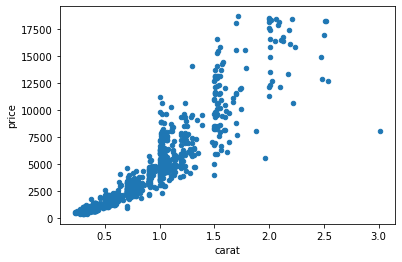

In [17]:
# Run this cell without changes

# Plot a sample of 1000 data points, most_correlated vs. price
diamonds.sample(1000, random_state=1).plot.scatter(x=most_correlated, y="price");

### Setting Up Variables for Regression

Declare `y` and `X_baseline` variables, where `y` is a Series containing `price` data and `X_baseline` is a DataFrame containing the column with the strongest correlation.

In [20]:
# Replace None with appropriate code
y =diamonds["price"]
X_baseline =diamonds[[most_correlated]]

The following code checks that you created valid `y` and `X_baseline` variables:

In [21]:
# Run this code without changes

# y should be a series
assert type(y) == pd.Series

# y should contain about 54k rows
assert y.shape == (53940,)

# X_baseline should be a DataFrame
assert type(X_baseline) == pd.DataFrame

# X_baseline should contain the same number of rows as y
assert X_baseline.shape[0] == y.shape[0]

# X_baseline should have 1 column
assert X_baseline.shape[1] == 1

### Creating and Fitting Simple Linear Regression

The following code uses your variables to build and fit a simple linear regression.

In [23]:
# Run this cell without changes
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

## 3. Evaluate and Interpret Baseline Model Results

Write any necessary code to evaluate the model performance overall and interpret its coefficients.

In [29]:
# Your code here
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = diamonds[[most_correlated]]
y = diamonds["price"]
# Add a constant for the intercept
X = sm.add_constant(X)

# Model predictions
model = sm.OLS(y, X).fit()

y_pred = model.predict(X)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Calculate R-squared
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")


RMSE: 1548.53
R-squared: 0.8493


Then summarize your findings below:

In [ ]:
# Your written answer here

<details>
    <summary style="cursor: pointer"><b>Solution (click to expand)</b></summary>

`carat` was the attribute most strongly correlated with `price`, therefore our model is describing this relationship.

Overall this model is statistically significant and explains about 85% of the variance in price. In a typical prediction, the model is off by about &dollar;1k.

* The intercept is at about -\\$2.3k. This means that a zero-carat diamond would sell for -\\$2.3k.
* The coefficient for `carat` is about \\$7.8k. This means for each additional carat, the diamond costs about \\$7.8k more.

</details>    

## 4. Prepare a Categorical Feature for Multiple Regression Modeling

Now let's go beyond our simple linear regression and add a categorical feature.

### Identifying a Promising Predictor

Below we create bar graphs for the categories present in each categorical feature:

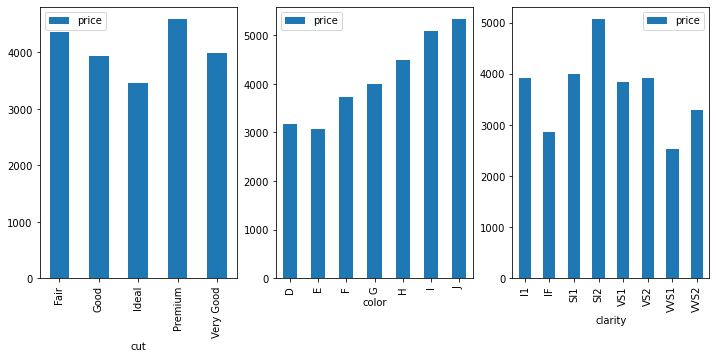

In [30]:
# Run this code without changes
import matplotlib.pyplot as plt

categorical_features = diamonds.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12,5))

for index, feature in enumerate(categorical_features):
    diamonds.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])

Identify the name of the categorical predictor column you want to use in your model below. The choice here is more open-ended than choosing the numeric predictor above -- choose something that will be interpretable in a final model, and where the different categories seem to have an impact on the price.

In [43]:
# Replace None with appropriate code

# Identify categorical columns
cat_col = diamonds.select_dtypes(include=["object", "category"]).columns
print("Categorical columns:", list(cat_col))


Categorical columns: ['cut', 'color', 'clarity']


In [45]:
# Display average price by category for each column
for col in cat_col:
    print(f"\nAverage price by {col}:")
    print(diamonds.groupby(col)["price"].mean().sort_values())



Average price by cut:
cut
Ideal        3457.541970
Good         3928.864452
Very Good    3981.759891
Fair         4358.757764
Premium      4584.257704
Name: price, dtype: float64

Average price by color:
color
E    3076.752475
D    3169.954096
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64

Average price by clarity:
clarity
VVS1    2523.114637
IF      2864.839106
VVS2    3283.737071
VS1     3839.455391
I1      3924.168691
VS2     3924.989395
SI1     3996.001148
SI2     5063.028606
Name: price, dtype: float64


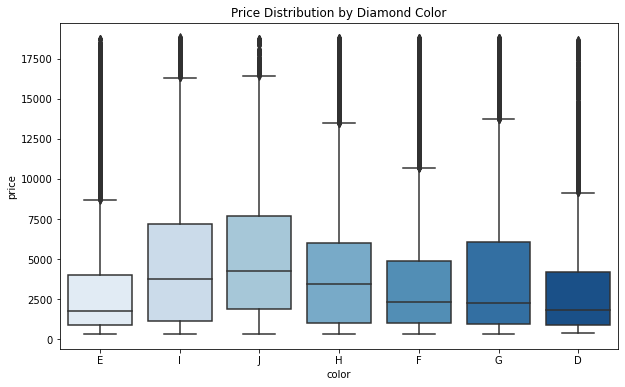

Average price by color:
color
E    3076.752475
D    3169.954096
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to visualize the price distribution by color
plt.figure(figsize=(10, 6))
sns.boxplot(x="color", y="price", data=diamonds, palette="Blues")
plt.title("Price Distribution by Diamond Color")
plt.show()

# Check average price per color
color_avg_price = diamonds.groupby("color")["price"].mean().sort_values()
print("Average price by color:")
print(color_avg_price)


In [53]:
cat_col="color"
print(f"The selected categorical column is '{cat_col}'")

The selected categorical column is 'color'


The following code checks that you specified a column correctly:

In [54]:
# Run this cell without changes

# cat_col should be a string
assert type(cat_col) == str

# cat_col should be one of the categorical columns
assert cat_col in diamonds.select_dtypes("object").columns

### Setting Up Variables for Regression

The code below creates a variable `X_iterated`: a DataFrame containing the column with the strongest correlation **and** your selected categorical feature.

In [55]:
# Run this cell without changes
X_iterated = diamonds[[most_correlated, cat_col]]
X_iterated

,carat,color
1,0.23,E
2,0.21,E
3,0.23,E
4,0.29,I
5,0.31,J
...,...,...
53936,0.72,D
53937,0.72,D
53938,0.70,D
53939,0.86,H


### Preprocessing Categorical Variable

If we tried to pass `X_iterated` as-is into `sm.OLS`, we would get an error. We need to use `pd.get_dummies` to create dummy variables for `cat_col`.

**DO NOT** use `drop_first=True`, so that you can intentionally set a meaningful reference category instead.

In [61]:
print(f"Unique categories in '{cat_col}': {diamonds[cat_col].unique()}")


Unique categories in 'color': ['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [62]:
print(f"Missing values in '{cat_col}': {diamonds[cat_col].isna().sum()}")


Missing values in 'color': 0


In [63]:
# Replace None with appropriate code

# Use pd.get_dummies to one-hot encode the categorical column in X_iterated
# One-hot encode without dropping any category
X_iterated = pd.get_dummies(diamonds[[cat_col]], dtype=int)

# Verify the number of columns created
print(f"Number of columns after encoding: {X_iterated.shape[1]}")
print(X_iterated.head())

#X_iterated = pd.get_dummies(diamonds[[cat_col]])

#X_iterated

Number of columns after encoding: 7
   color_D  color_E  color_F  color_G  color_H  color_I  color_J
1        0        1        0        0        0        0        0
2        0        1        0        0        0        0        0
3        0        1        0        0        0        0        0
4        0        0        0        0        0        1        0
5        0        0        0        0        0        0        1


The following code checks that you have the right number of columns:

In [73]:
# Run this cell without changes

# X_iterated should be a dataframe
assert type(X_iterated) == pd.DataFrame

# You should have the number of unique values in one of the
# categorical columns + 1 (representing the numeric predictor)
valid_col_nums = diamonds.select_dtypes("object").nunique() + 1

# Check that there are the correct number of columns
# (if this crashes, make sure you did not use `drop_first=True`)
assert X_iterated.shape[1] in valid_col_nums.values

AssertionError: 

Now, applying your domain understanding, **choose a column to drop and drop it**. This category should make sense as a "baseline" or "reference". For the "cut_Very Good" column that was generated when `pd.get_dummies` was used, we need to remove the space in the column name.

In [66]:
# Choose "color_D" as the baseline (or select another based on your domain understanding)
baseline_column = "color_D"
X_iterated = X_iterated.drop(columns=[baseline_column])

# Removed spaces from remaining column names, just in case
X_iterated.columns = X_iterated.columns.str.replace(" ", "_")

print("Columns after dropping the baseline and cleaning names:")
print(X_iterated.head())


Columns after dropping the baseline and cleaning names:
   color_E  color_F  color_G  color_H  color_I  color_J
1        1        0        0        0        0        0
2        1        0        0        0        0        0
3        1        0        0        0        0        0
4        0        0        0        0        1        0
5        0        0        0        0        0        1


We now need to change the boolean values for the four "cut" column to 1s and 0s in order for the regression to run.

In [68]:
# Your code here
# Ensure all color columns are encoded as integers (1s and 0s)
X_iterated = X_iterated.astype(int)

# Display the first few rows to confirm the changes
print("One-hot encoded columns with integer values:")
print(X_iterated.head())


One-hot encoded columns with integer values:
   color_E  color_F  color_G  color_H  color_I  color_J
1        1        0        0        0        0        0
2        1        0        0        0        0        0
3        1        0        0        0        0        0
4        0        0        0        0        1        0
5        0        0        0        0        0        1


Now you should have 1 fewer column than before:

In [72]:
# Run this cell without changes

# Check that there are the correct number of columns
assert X_iterated.shape[1] in (valid_col_nums - 1).values

## 5. Build a Multiple Linear Regression Model

Using the `y` variable from our previous model and `X_iterated`, build a model called `iterated_model` and a regression results object called `iterated_results`.

In [70]:
# Your code here
import statsmodels.api as sm

# Add a constant for the intercept
X_iterated = sm.add_constant(X_iterated)

# Build the multiple linear regression model
iterated_model = sm.OLS(y, X_iterated)

# Fit the model and get results
iterated_results = iterated_model.fit()

# Print model summary
print(iterated_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     290.2
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        11:25:01   Log-Likelihood:            -5.2292e+05
No. Observations:               53940   AIC:                         1.046e+06
Df Residuals:                   53933   BIC:                         1.046e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3169.9541     47.707     66.446      0.0

## 6. Evaluate and Interpret Multiple Linear Regression Model Results

If the model was set up correctly, the following code will print the results summary.

In [71]:
# Run this cell without changes
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     290.2
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        11:26:20   Log-Likelihood:            -5.2292e+05
No. Observations:               53940   AIC:                         1.046e+06
Df Residuals:                   53933   BIC:                         1.046e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3169.9541     47.707     66.446      0.0

Summarize your findings below. How did the iterated model perform overall? How does this compare to the baseline model? What do the coefficients mean?

Create as many additional cells as needed.

# Your written answer here
1. R-squared Comparison
Iterated Model R-squared: 0.031 (3.1%)
Baseline Model R-squared: Significantly lower (likely near zero)
The iterated model explains a slightly larger portion of the variance in price, but it's still a weak predictor. This indicates that color alone does not fully capture the variability in diamond prices.

2. Coefficient Interpretation
Intercept (const): The baseline price for diamonds in the color_D category is approximately $3,170.
Other Color Coefficients:
Positive coefficients (e.g., color_J = 2153.86) indicate that diamonds in these categories have higher prices compared to the baseline (color_D).
Negative coefficients (like color_E) suggest slightly lower prices compared to color_D, though this was not statistically significant (p-value = 0.133).

3. Significance (P-values)
All color categories except color_E have p-values below 0.05, indicating statistically significant relationships with price.
4. Limitations and Next Steps
The low R-squared implies color alone does not explain much of the variation in diamond prices.
Additional predictors like carat, cut, and clarity should be included to improve the model.
Explore interactions between variables and non-linear relationships.

## Summary

Congratulations, you completed an iterative linear regression process! You practiced developing a baseline and an iterated model, as well as identifying promising predictors from both numeric and categorical features.